# Error propagration with taking into account of correlations b/w parameters

In other notebook, we showed that, for higher redshifts, errorbars in SFRD are pretty large; could this be due to correlation among parameters -- meaning the Schechter function parameters, $M_*$, $\phi_*$ and $\alpha$ are not independent of each other. Previously we considered them as independent Gaussian variables. Now, we would like to take in account of this correlations. We, however, first treat them as Gaussian independent variables and see what we could get, i.e., we check how well we can constrain SFRD.

In the following notebook, we use data from [Bouwens+15](https://ui.adsabs.harvard.edu/abs/2015ApJ...803...34B/abstract).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.constants as con
import os
import corner
import utils as utl

In [5]:
# Redshift
z_bou = np.array([4,5,6,7,8])

# Characteristic absolute magnitude
mst_bou = np.array([-20.88, -21.17, -20.94, -20.87, -20.63])
msterr_bou = np.array([0.08, 0.12, 0.2, 0.26, 0.36])

# Characteristic luminosity
lst_bou = np.array([])
lsterr_bou = np.array([])

for i in range(len(mst_bou)):
    mst1 = np.random.normal(mst_bou[i], msterr_bou[i], 10000)
    lst1 = utl.m_to_l_wave(mst1, 1500)
    lst_bou = np.hstack((lst_bou, np.mean(lst1)))
    lsterr_bou = np.hstack((lsterr_bou, np.std(lst1)))

# Alpha
alp_bou = np.array([-1.64, -1.76, -1.87, -2.06, -2.02])
alperr_bou = np.array([0.04, 0.05, 0.1, 0.13, 0.23])

# Normalisation constant
phi_bou = np.array([1.97, 0.74, 0.50, 0.29, 0.21])*0.001
phierr_bou = np.array([0.3, 0.16, 0.19, 0.16, 0.17])*0.001

log_phi_bou, log_phi_bou_err = utl.log_err(phi_bou, phierr_bou)


# Kappas
sol_lum = (con.L_sun*1e7).value
kap_uv = 2.2e-10/sol_lum
kap_ir = 4.5*10**(-44)

# Range of Luminosities (or absolute magnitudes) used
mags_bou = np.linspace(-24, -13, 1000)
lums_bou = utl.m_to_l_wave(mags_bou, 1500)

#print(np.log10(lst_bou))
#print(np.log10(lsterr_bou))
#print(np.log10(lums_bou))

In [3]:
sfrd_bou = np.array([])
sfrd_err_bou = np.array([])

z_bou1 = np.array([z_bou[2]])

for i in range(len(z_bou)):
    sfr1, sfr_e1 = utl.sfrd_w_err(lum=lums_bou, lum1=lst_bou[i], lum1err=lsterr_bou[i], phi1=phi_bou[i], phi1err=phierr_bou[i], alpha=alp_bou[i], alphaerr=alperr_bou[i], kappa=kap_uv)
    #print('\n SFRD')
    #print(sfr1)
    #print(sfr_e1)
    if sfr1 != 0:
        sfrd_bou = np.hstack((sfrd_bou, sfr1))
        sfrd_err_bou = np.hstack((sfrd_err_bou, sfr_e1))

  0%|          | 9/10000 [00:00<02:07, 78.55it/s]
length: 
10000
  0%|          | 6/10000 [00:00<03:06, 53.50it/s]
length: 
10000
  0%|          | 10/10000 [00:00<01:48, 92.36it/s]
length: 
10000
  0%|          | 9/10000 [00:00<01:51, 89.65it/s]
length: 
10000
100%|██████████| 10000/10000 [01:46<00:00, 93.60it/s]
length: 
9987



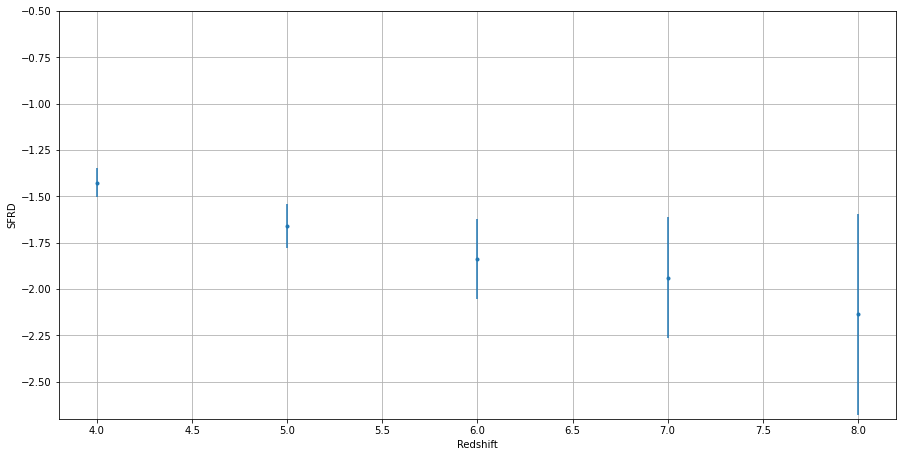

In [4]:
log_sfrd_bou = np.array([])
log_sfrd_bou_err = np.array([])

for i in range(len(sfrd_bou)):
    par, err = utl.log_err(sfrd_bou[i], sfrd_err_bou[i])
    log_sfrd_bou = np.hstack((log_sfrd_bou, par))
    log_sfrd_bou_err = np.hstack((log_sfrd_bou_err, err))

plt.figure(figsize=(15,7.5))
plt.errorbar(z_bou, log_sfrd_bou, yerr=log_sfrd_bou_err, fmt='.')
plt.xlabel('Redshift')
plt.ylabel('SFRD')
plt.ylim([-2.7, -0.5])
plt.grid()

As with the other notebook, errorbars are pretty large, epsecially for the higher redshifts.

## Generating correlated parameters

We now want to take into account of correlations between parameters. To do so, we use the covariance matrix (calculated elsewhere) for each redshift and draw random normal sample using this matrix, using `numpy.random.multivariate_normal` function. However, before using it into the practice, we first want to check if it works properly or not.

Hence, below we draw a sample using the following covariance matrix,

\begin{bmatrix}
0.03753042 & 0.0276935 & 0.01513143\\
0.0276935 & 0.02369625 & 0.01337057\\
0.01513143 & 0.01337057 & 0.00942249
\end{bmatrix}

to draw samples of $M_*$, $\log{\phi_*}$ and $\alpha$ (the order of this, by the way represents the order in the given covariance matrix). we use the given mean values of the parameters, and above covariance matrix and `numpy.random.multivariate_normal` function to generate 10000 samples of $M_*$, $\log{\phi_*}$ and $\alpha$. We also plot them to see if it works properly or not.

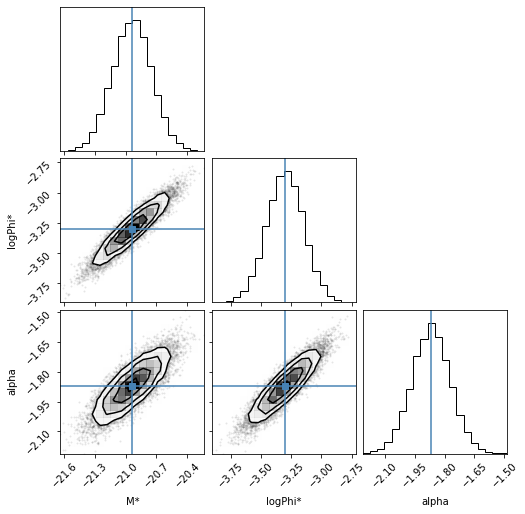

In [16]:
means_mpa = np.array([-20.94, -3.3010299956639813, -1.87])

cov_mpa = np.array([[0.03753042, 0.0276935, 0.01513143],\
                   [0.0276935, 0.02369625, 0.01337057],\
                    [0.01513143, 0.01337057, 0.00942249]])

samples = np.random.multivariate_normal(means_mpa, cov_mpa, 10000)

lbs = np.array(['M*', 'logPhi*', 'alpha'])

corner.corner(samples, labels=lbs, truths=means_mpa)
plt.show()

We now convert $M_*$ and $\log{\phi_*}$ into $L_*$ and $\phi_*$, respectively. This would give us the correlated samples of $L_*$, $\phi_*$ and $\alpha$.

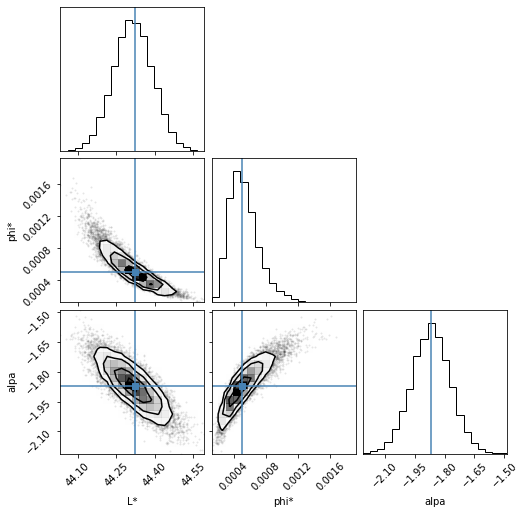

In [24]:
lum_6 = np.log10(utl.m_to_l_wave(samples.T[0], 1500))
phi_6 = 10**samples.T[1]
alp_6 = samples.T[2]

ab = np.vstack((lum_6, phi_6))
new_samples = np.vstack((ab, alp_6)).T

corner.corner(new_samples, truths=np.array([np.log10(lst_bou[2]), phi_bou[2], alp_bou[2]]), labels=np.array(['L*', 'phi*', 'alpa']))
plt.show()